Nama: Fransisca Mulya Sari

Kelas : PYTN KS 014

Kode Peserta : PYTN - KS014 - 011

# ASSIGNMENT PYTHON 3
-------------------------------------------------

- Pada assignment 3 ini, projects rubricnya adalah sebagai berikut.

**Code Review**

|Criteria|Meet Expectations|
|:--------|:------------------|
|Logistic Regression|Mengimplementasikan Logistic Regression Dengan Scikit-Learn|
|K-Nearest Neighbors|Mengimplementasikan K-Nearest Neighbors Dengan Scikit-Learn|
|Support Vector Machine|Mengimplementasikan Support Vector Machine Dengan Scikit-Learn|
|Decision Tree|Mengimplementasikan Decision Tree Dengan Scikit-Learn|
|Random Forest|Mengimplementasikan Random Forest Dengan Scikit-Learn|
|Naive Bayes|Mengimplementasikan Naive Bayes Dengan Scikit-Learn|
|Confusion Matrix|Mengimpelentasikan Confusion Matrix Regression Dengan Scikit-Learn|
|Visualization|Menganalisa Data Menggunakan Setidaknya 2 Tipe Grafik/Plot.|
|PreProcessing|Melakukan Preproses Dataset Sebelum Melakukan Penelitian Lebih Dalam.|
|Apakah Kode Berjalan Tanpa Ada Eror?|Seluruh Kode Berfungsi Dan Dibuat Dengan Benar|


**Readibility**

|Criteria|Meet Expectations|
|:--------|:------------------|
|Tertata dengan baik|Semua Cell Di Notebook Terdokumentasi Dengan Baik Dengan Markdown Pada Tiap Cell Untuk Penjelasan Kode.|


**Analysis**

|Criteria|Meet Expectations|
|:--------|:------------------|
|OAlgorithm Analysis|Student Menjelaskan Alasan Mengapa Memilih Menggunakan Algoritma Tersebut Untuk Membuat Model.|

- Sumber data: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

# A. Import Library

In [1]:
# digunakan untuk dataframe
import pandas as pd
import numpy as np

# digunakan untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# digunakan untuk explorisasi data
from sklearn.preprocessing import LabelEncoder, StandardScaler

# digunakan untuk modeling
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import sklearn.tree as DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVC
from six import StringIO
from IPython.display import Image
import pydotplus

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Install package untuk visualisasi
!conda install python-graphviz -y
!pip install python-graphviz -y
!pip install pydotplus

'conda' is not recognized as an internal or external command,
operable program or batch file.

Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -y



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## B. Data Understanding
Data understanding adalah sebuah tahapan yang bertujuan untuk mendapatkan pemahaman awal mengenai data yang dibutuhkan untuk memecahkan permasalahan yang diberikan.

## C. Data Collection
Data collection atau pengumpulan data adalah prosedur mengumpulkan, mengukur, dan menganalisis berbagai tipe informasi menggunakan teknik yang berstandar.

In [3]:
df = pd.read_csv("bank-full.csv")
df

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


Ternyata datanya berbentuk 1 kolom dan 45211 baris. Jelas bentuk ini masih berantakan. Oleh karena itu, mari kita benarkan dengan menggunakan **delimiter** dan **quotechar**.

In [4]:
df = pd.read_csv("bank-full.csv", delimiter=";", quotechar='"')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Dapat dilihat bahwa column dan dtype sudah sesuai dengan jenisnya masing-masing. Namun, untuk memodelkan data tersebut menjadi machine learning, diharuskan mengubah keseluruhan dtype kolom menjadi int32 atau int64. Hal ini akan dibahas pada **Label Encode** nanti. Selanjutnya, kita akan mengubah nama kolom **y** menjadi **Client_Subscribed** agar lebih mudah dimengerti.

In [12]:
df = df.rename(columns={"y":'Client_Subscribed'})
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Client_Subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


**This dataset contains:**

#### bank client data:
1 - age (numeric) <br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no', 'yes', 'unknown')<br>
6 - housing: has housing loan? (categorical: 'no', 'yes', 'unknown')<br>
7 - loan: has personal loan? (categorical: 'no', 'yes', 'unknown')<br>

#### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular', 'telephone')<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>

#### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')<br>

#### Output variable (desired target):
16 - y - has the client subscribed a term deposit? (binary: 'yes','no')


Sumber data : https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

# D. Data cleaning

In [13]:
df.shape

(45211, 17)

In [14]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [15]:
df.isna().sum()

age                  0
job                  0
marital              0
education            0
default              0
balance              0
housing              0
loan                 0
contact              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
Client_Subscribed    0
dtype: int64

In [16]:
df.duplicated().sum()

0

Berdasarkan data cleaning yang dilakukan, diperoleh informasi bahwa:
- Data mempunyai bentuk : 45211 baris dan 17 kolom
- Data mempunyai describe seperti diatas
- Data tidak mempunyai nilai NaN
- Data tidak mempunyai duplikat

# E. Visualisasi data
1. Bagaimana perbandingan client yang berlangganan dan tidak berlangganan deposit ini?
2. Apa jenis marital status terbanyak dari client yang berlangganan deposit ini?
3. Pada bulan apa client paling sering last contact dengan bank?

### 1. Bagaimana perbandingan client yang berlangganan dan tidak berlangganan deposit ini?

In [17]:
subs = pd.DataFrame({"Jumlah Jawaban":df["Client_Subscribed"].value_counts()})
subs

,Jumlah Jawaban
Client_Subscribed,
no,39922
yes,5289


In [18]:
jumlah_data = subs["Jumlah Jawaban"]

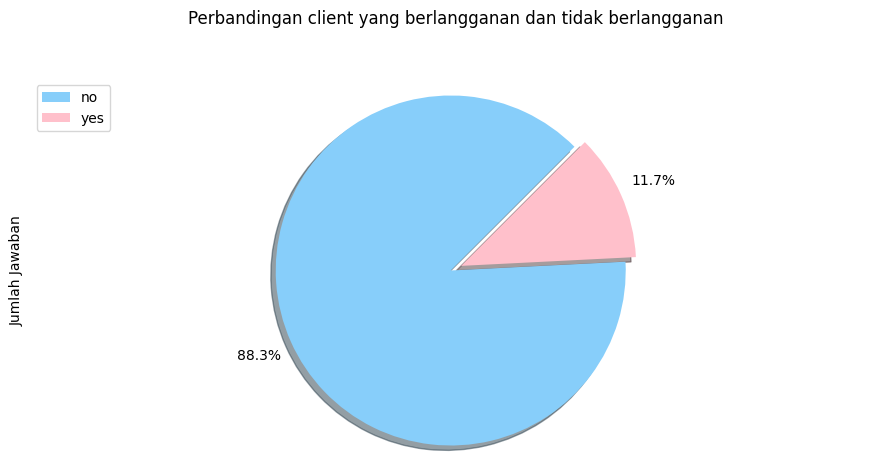

In [19]:
#pilih warna
colors_list = ['lightskyblue','pink']

#pilih ukuran lingkaran
explode_list = [0.015, 0.05]

#Tambahkan details
jumlah_data.plot(kind='pie',
        figsize=(11,5),
        autopct='%1.1f%%',
        startangle=45,
        shadow=True,
        labels=None,
        pctdistance=1.2,
        colors=colors_list,
        explode=explode_list)

#untuk memberikan informasi daerah berwarna
plt.legend(labels=jumlah_data.index,loc='upper left')
plt.axis('equal')

#menambahkan judul
plt.title('Perbandingan client yang berlangganan dan tidak berlangganan',y=1.12)

#menampilkan
plt.show()

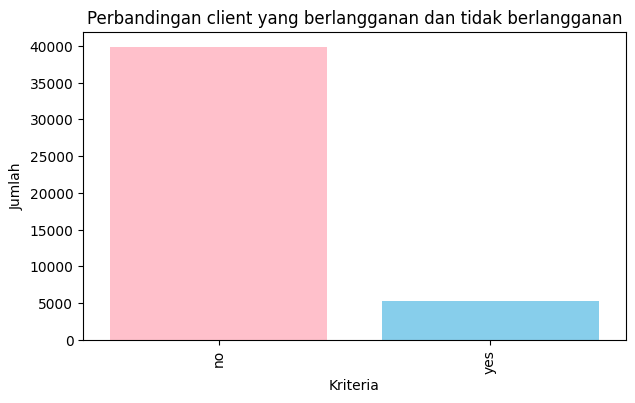

In [20]:
label=["YES","NO"]
jumlah_data.plot(kind="bar", figsize=(7,4))
plt.bar(label,jumlah_data, color=['pink', 'skyblue'])
plt.title('Perbandingan client yang berlangganan dan tidak berlangganan') #judul
plt.xlabel("Kriteria")
plt.ylabel("Jumlah")
plt.show() #tampilkan

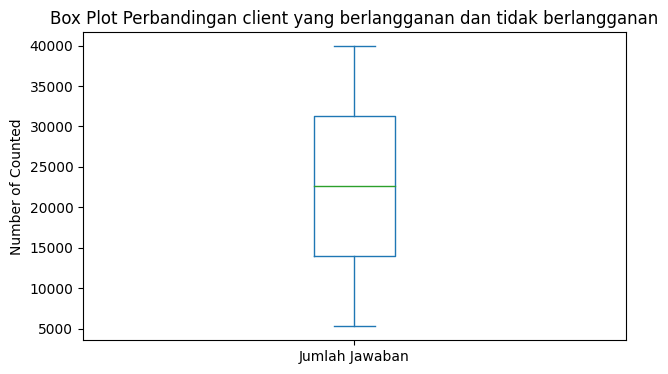

In [21]:
jumlah_data.plot(kind='box', figsize=(7,4))

plt.title('Box Plot Perbandingan client yang berlangganan dan tidak berlangganan')
plt.ylabel('Number of Counted')
plt.xlabel('')

plt.show()

### 2. Apa jenis marital status terbanyak dari client yang berlangganan deposit ini?

In [22]:
marital = pd.DataFrame({"Jumlah":df["marital"].value_counts()})
marital

,Jumlah
marital,
married,27214
single,12790
divorced,5207


In [23]:
M = df.loc[0:,['marital','Client_Subscribed']]
M

,marital,Client_Subscribed
0,married,no
1,single,no
2,married,no
3,married,no
4,single,no
...,...,...
45206,married,yes
45207,divorced,yes
45208,married,yes
45209,married,no


In [24]:
Marr = (M[(M['marital'] == 'married') & (M['Client_Subscribed'] == 'yes')])
Marr

,marital,Client_Subscribed
83,married,yes
86,married,yes
87,married,yes
129,married,yes
168,married,yes
...,...,...
45200,married,yes
45201,married,yes
45204,married,yes
45206,married,yes


In [25]:
Sing = (M[(M['marital'] == 'single') & (M['Client_Subscribed'] == 'yes')])
Sing

,marital,Client_Subscribed
270,single,yes
446,single,yes
569,single,yes
849,single,yes
897,single,yes
...,...,...
45196,single,yes
45197,single,yes
45202,single,yes
45203,single,yes


In [26]:
Div = (M[(M['marital'] == 'divorced') & (M['Client_Subscribed'] == 'yes')])
Div

,marital,Client_Subscribed
390,divorced,yes
512,divorced,yes
891,divorced,yes
1193,divorced,yes
1340,divorced,yes
...,...,...
45121,divorced,yes
45125,divorced,yes
45177,divorced,yes
45191,divorced,yes


In [27]:
mar = pd.DataFrame({"Jumlah married":Marr["Client_Subscribed"].value_counts()})
mar

,Jumlah married
Client_Subscribed,
yes,2755


In [28]:
sin = pd.DataFrame({"Jumlah Single":Sing["Client_Subscribed"].value_counts()})
sin

,Jumlah Single
Client_Subscribed,
yes,1912


In [29]:
di = pd.DataFrame({"Jumlah Divorced":Div["Client_Subscribed"].value_counts()})
di

,Jumlah Divorced
Client_Subscribed,
yes,622


In [30]:
df_marital = pd.concat([mar,sin,di], axis=1)
df_marital

,Jumlah married,Jumlah Single,Jumlah Divorced
Client_Subscribed,,,
yes,2755,1912,622


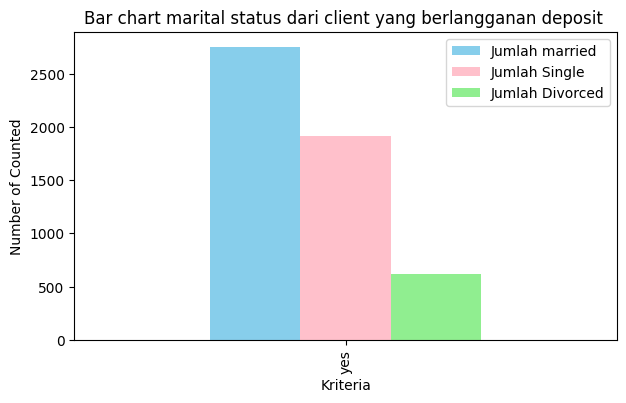

In [31]:
df_marital.plot(kind='bar', figsize=(7,4), color=('skyblue','pink','lightgreen'))

plt.title('Bar chart marital status dari client yang berlangganan deposit ')
plt.ylabel('Number of Counted')
plt.xlabel('Kriteria')

plt.show()

### 3. Pada bulan apa client paling sering last contact dengan bank?

In [32]:
month = df['month'].value_counts()
month

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

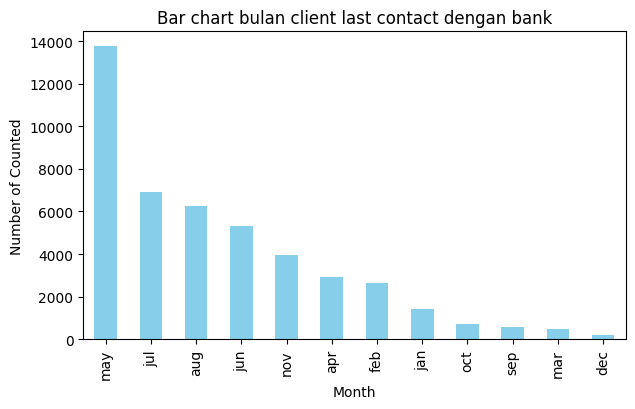

In [33]:
month.plot(kind='bar', figsize=(7, 4), color='skyblue')

plt.title('Bar chart bulan client last contact dengan bank')
plt.ylabel('Number of Counted')
plt.xlabel('Month')

plt.show()

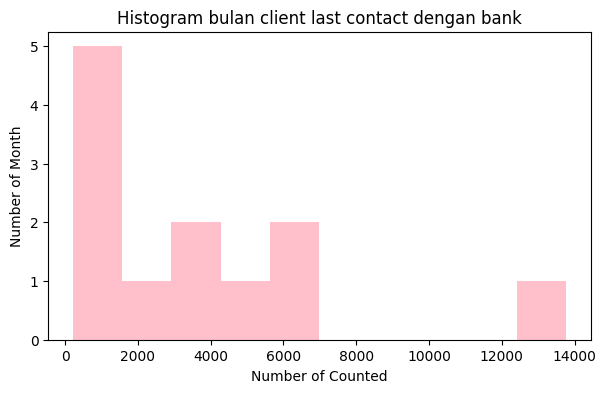

In [34]:
month.plot(kind='hist', figsize=(7,4), color='pink')

plt.title('Histogram bulan client last contact dengan bank')
plt.ylabel('Number of Month')
plt.xlabel('Number of Counted')

plt.show()

## F. Preprocesing Data

### F.1 Label Encoder
Label Encoder digunakan untuk mengubah dtype object menjadi int32. Hal ini berfungsi untuk memudahkan proses dalam memodelkan kedalam machine learning nanti.

In [35]:
# preprocessing.LabelEncoder() digunakan untuk membuat objek LabelEncoder yang akan digunakan untuk melakukan encoding pada setiap kolom.
label_encoder = preprocessing.LabelEncoder()

# mengambil tipe data object pada dataset dan di simpan di df_new
df_category = df.select_dtypes(include='object')
df_new = df.copy()

for column in df_category.columns:
    df_new[column] = label_encoder.fit_transform(df[column])

In [36]:
df_new

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Client_Subscribed
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [37]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45211 non-null  int64
 1   job                45211 non-null  int32
 2   marital            45211 non-null  int32
 3   education          45211 non-null  int32
 4   default            45211 non-null  int32
 5   balance            45211 non-null  int64
 6   housing            45211 non-null  int32
 7   loan               45211 non-null  int32
 8   contact            45211 non-null  int32
 9   day                45211 non-null  int64
 10  month              45211 non-null  int32
 11  duration           45211 non-null  int64
 12  campaign           45211 non-null  int64
 13  pdays              45211 non-null  int64
 14  previous           45211 non-null  int64
 15  poutcome           45211 non-null  int32
 16  Client_Subscribed  45211 non-null  int32
dtypes: int32(10)

In [38]:
df_new['Client_Subscribed'].value_counts()

Client_Subscribed
0    39922
1     5289
Name: count, dtype: int64

Pada tugas ini, saya menggunakan kolom **Client_Subscribed** untuk menjadi **Y**, karena merupakan kolom yang hanya bernilai 0 (false) atau 1 (true).<br>
Bisa dilihat bahwa datanya sangat berbeda jauh antara 0 = no, dan 1 = yes. Oleh karena itu, mari kita lakukan balancing dengan menggunakan metode **Undersampling**

# G. UNDERSAMPLING
Undersampling adalah menyeimbangkan dataset dengan mengurangi ukuran kelas yang berlimpah. Pada kasus ini, saya akan membuat dataset menjadi 5289.

In [39]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df_new[(df_new['Client_Subscribed']==0)] 
df_minority = df_new[(df_new['Client_Subscribed']==1)] 
# upsample minority class
df_majority_undersampling = resample(df_majority, replace = True, n_samples = 5289, random_state = 42)
# Combine majority class with upsampled minority class
df_undersampling = pd.concat([df_majority_undersampling, df_minority]) 
df_undersampling

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Client_Subscribed
16514,42,9,2,1,0,2646,1,0,0,23,5,280,4,-1,0,3,0
876,37,11,2,3,0,414,1,0,2,7,8,131,1,-1,0,3,0
41667,54,4,2,2,0,2081,0,0,0,1,10,395,2,108,1,0,0
11710,58,9,1,1,0,683,0,0,2,20,6,157,2,-1,0,3,0
6465,30,4,1,1,0,-397,1,0,2,27,8,141,3,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,5,1,1,0,2850,0,0,0,17,9,300,1,40,8,0,1
45205,25,9,2,1,0,505,0,1,0,17,9,386,2,-1,0,3,1
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1


In [40]:
df_undersampling['Client_Subscribed'].value_counts()

Client_Subscribed
0    5289
1    5289
Name: count, dtype: int64

Bisa dilihat bahwa datanya sudah menyesuaikan nilai minoritas atau dalam hal ini sebanyak 5289. Next kita lanjut standarisasi dan modelling.

# H. Standarisasi data
Standarisasi data dilakukan untuk menyeragamkan nilai-nilai data yang pada penginputannya formatnya tidak konsisten menggunakan suatu format tertentu, hingga seluruh data menjadi standar. 

In [41]:
#Membuat objek StandardScaler utuk melakukan scaling pada setiap kolom numerik
scaler = preprocessing.StandardScaler()

#Copy data frame df_new dan simpan pada scale_df
scale_df = df_undersampling.copy()

#Setiap kolom diubah nilainya dengan method fit_trasnform() dan hasilnya disimpan pada numeric_df
numeric_df = df_undersampling.select_dtypes(include=['int64','float64','int32'])
for column in numeric_df.columns:
  scale_df[column] = scaler.fit_transform(df_undersampling[column].values.reshape(-1,1))

In [42]:
scale_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Client_Subscribed
16514,0.053404,1.397834,1.271204,-0.390782,-0.119529,0.340521,1.065478,-0.386210,-0.588447,0.892191,-0.137454,-0.282314,0.587816,-0.488503,-0.379111,0.527119,-1.0
876,-0.363998,2.018676,1.271204,2.285613,-0.119529,-0.347588,1.065478,-0.386210,1.870893,-1.015405,0.800804,-0.707775,-0.567358,-0.488503,-0.379111,0.527119,-1.0
41667,1.055171,-0.154271,1.271204,0.947416,-0.119529,0.166335,-0.938546,-0.386210,-0.588447,-1.730754,1.426309,0.046062,-0.182300,0.506320,0.073921,-2.439291,-1.0
11710,1.389093,1.397834,-0.319568,-0.390782,-0.119529,-0.264657,-0.938546,-0.386210,1.870893,0.534516,0.175299,-0.633533,-0.182300,-0.488503,-0.379111,0.527119,-1.0
6465,-0.948362,-0.154271,-0.319568,-0.390782,-0.119529,-0.597613,1.065478,-0.386210,1.870893,1.369090,0.800804,-0.679220,0.202758,-0.488503,-0.379111,0.527119,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,2.641300,0.156150,-0.319568,-0.390782,-0.119529,0.403412,-0.938546,-0.386210,-0.588447,0.176842,1.113557,-0.225205,-0.567358,-0.114303,3.245138,-2.439291,1.0
45205,-1.365764,1.397834,1.271204,-0.390782,-0.119529,-0.319533,-0.938546,2.589266,-0.588447,0.176842,1.113557,0.020363,-0.182300,-0.488503,-0.379111,0.527119,1.0
45206,0.804729,1.397834,-0.319568,0.947416,-0.119529,-0.220880,-0.938546,-0.386210,-0.588447,0.176842,1.113557,1.707929,0.202758,-0.488503,-0.379111,0.527119,1.0
45207,2.474339,0.156150,-1.910340,-1.728980,-0.119529,0.057817,-0.938546,-0.386210,-0.588447,0.176842,1.113557,0.220244,-0.182300,-0.488503,-0.379111,0.527119,1.0


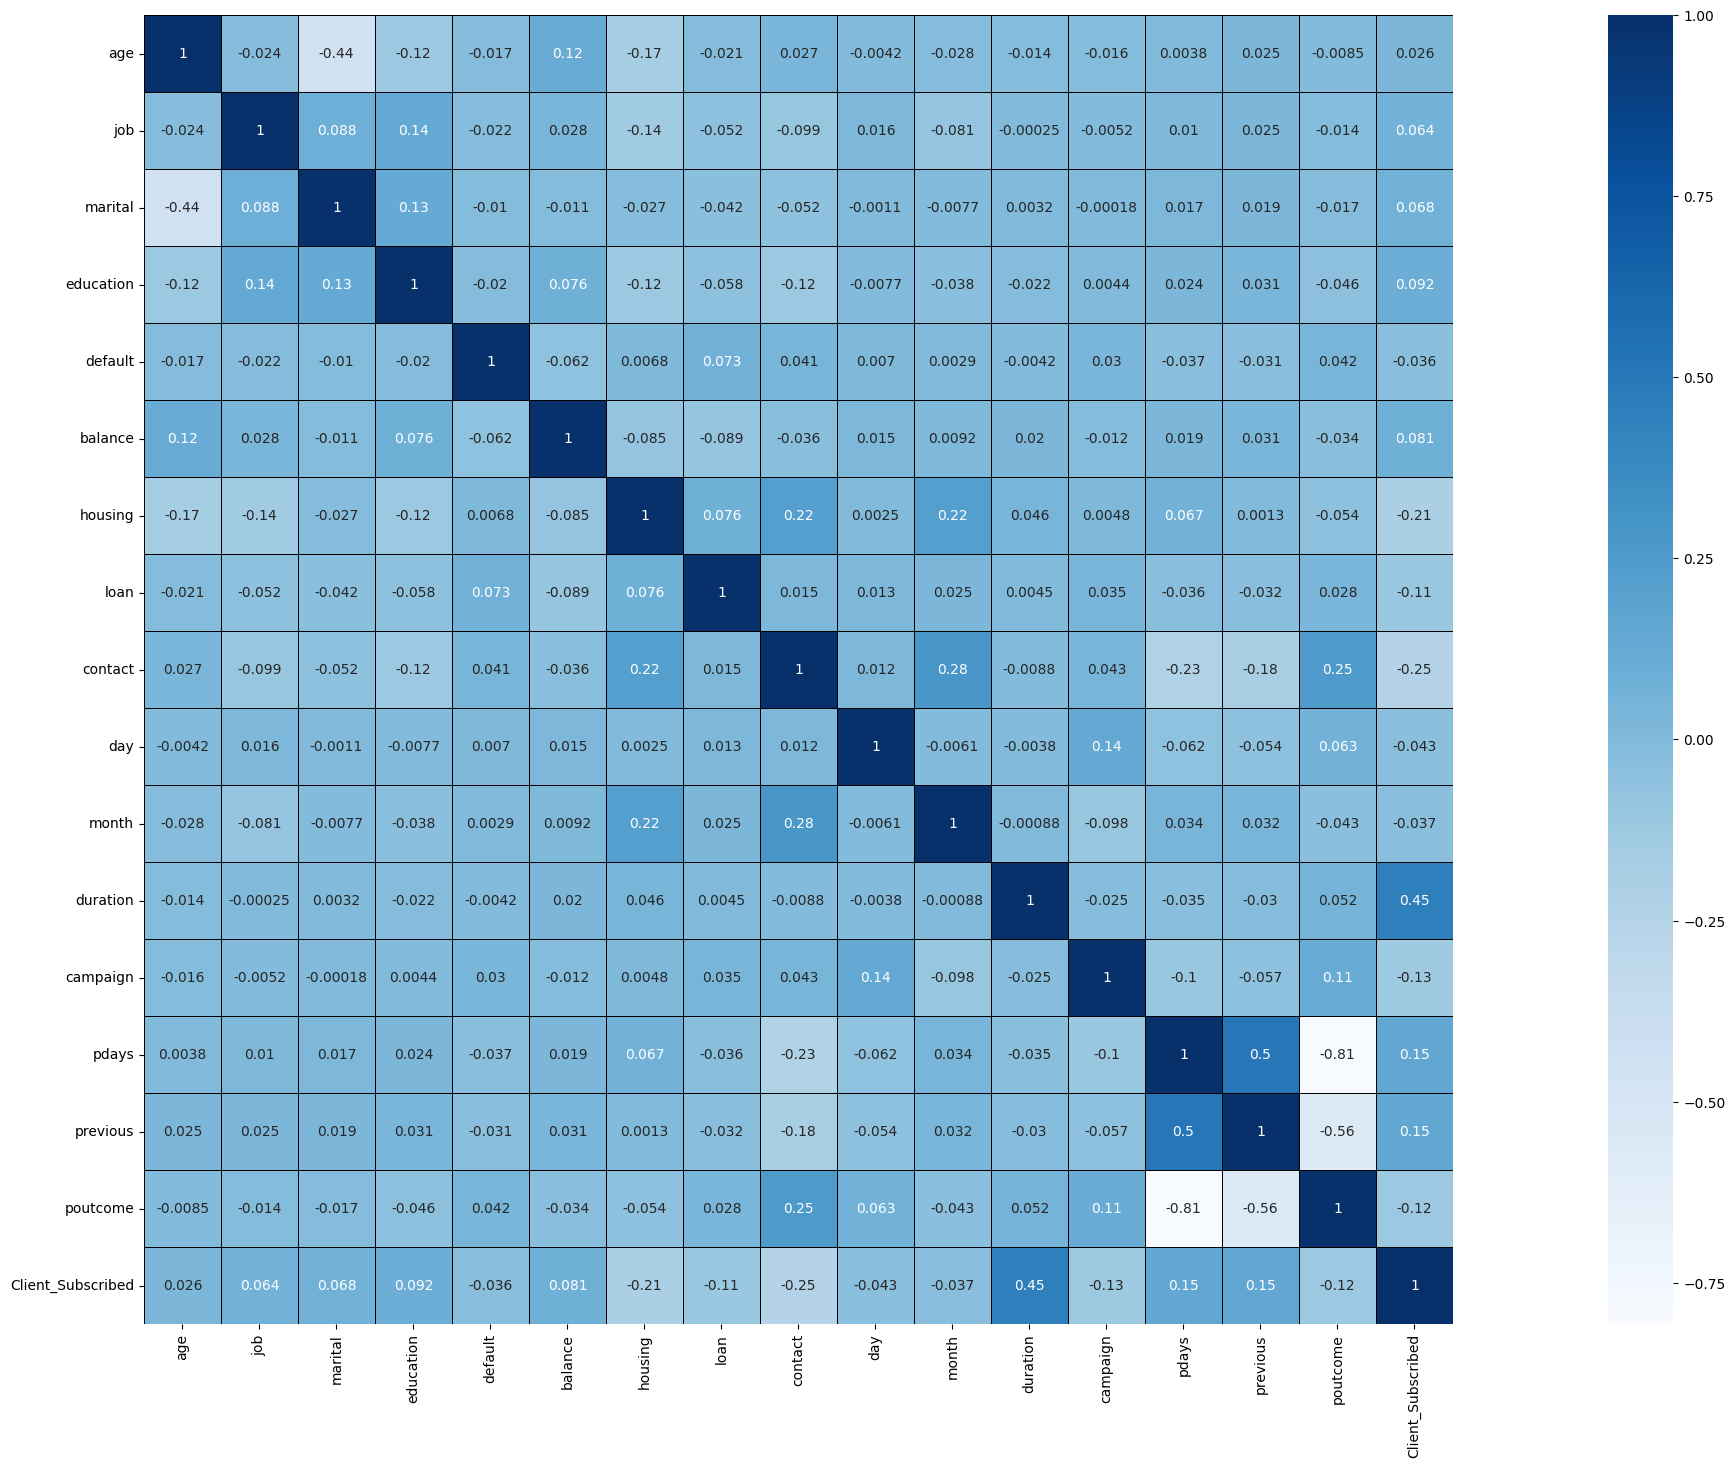

In [43]:
plt.figure(figsize=(40, 17))
ax = sns.heatmap(scale_df.corr(),annot=True, cmap='Blues', linewidths=.5, linecolor='black', square=True)

# I. Model di Machine Learning

Model yang kita buat akan ada 7, diantaranya: 
1. Logistic Regression
2. K-Nearest Neighbour
3. Support Vector Machine
4. Decision Tree
5. Random Forest
6. Naive Bayes
7. Confusion Matrix

**Catatan:**<br>
Dalam memodelkan, gunakan df_undersampling ya! Karena datanya sudah melalui proses undersampling.

In [37]:
# Melihat jumlah 0 pada masing-masing kolom
print("- rows in dataframe {0}".format(len(df_undersampling)))
print("- rows missing age: {0}".format(len(df_undersampling.loc[df_undersampling['age'] == 0])))
print("- rows missing job: {0}".format(len(df_undersampling.loc[df_undersampling['job'] == 0])))
print("- rows missing marital: {0}".format(len(df_undersampling.loc[df_undersampling['marital'] == 0])))
print("- rows missing education: {0}".format(len(df_undersampling.loc[df_undersampling['education'] == 0])))
print("- rows missing default: {0}".format(len(df_undersampling.loc[df_undersampling['default'] == 0])))
print("- rows missing balance: {0}".format(len(df_undersampling.loc[df_undersampling['balance'] == 0])))
print("- rows missing housing: {0}".format(len(df_undersampling.loc[df_undersampling['housing'] == 0])))
print("- rows missing loan: {0}".format(len(df_undersampling.loc[df_undersampling['loan'] == 0])))
print("- rows missing contact: {0}".format(len(df_undersampling.loc[df_undersampling['contact'] == 0])))
print("- rows missing day: {0}".format(len(df_undersampling.loc[df_undersampling['day'] == 0])))
print("- rows missing month: {0}".format(len(df_undersampling.loc[df_undersampling['month'] == 0])))
print("- rows missing duration: {0}".format(len(df_undersampling.loc[df_undersampling['duration'] == 0])))
print("- rows missing campaign: {0}".format(len(df_undersampling.loc[df_undersampling['campaign'] == 0])))
print("- rows missing pdays: {0}".format(len(df_undersampling.loc[df_undersampling['pdays'] == 0])))
print("- rows missing previous: {0}".format(len(df_undersampling.loc[df_undersampling['previous'] == 0])))
print("- rows missing poutcome: {0}".format(len(df_undersampling.loc[df_undersampling['poutcome'] == 0])))

- rows in dataframe 10578
- rows missing age: 0
- rows missing job: 1239
- rows missing marital: 1241
- rows missing education: 1384
- rows missing default: 10429
- rows missing balance: 732
- rows missing housing: 5624
- rows missing loan: 9205
- rows missing contact: 7694
- rows missing day: 0
- rows missing month: 869
- rows missing duration: 1
- rows missing campaign: 0
- rows missing pdays: 0
- rows missing previous: 7831
- rows missing poutcome: 1199


Ternyata ada banyak data yang memiliki 0 value, apakah kita bisa melanjutkan ini? Sebenarnya kita bisa mengisi row yang kosong dengan beberapa cara, karena disini total data ada 10.578 tapi missing value paling banyak yaitu default ada 10.429, jadi saya akan **tidak mengikutsertakan beberapa kolom kedalam X**. <br>
Untuk meminimalisir missing value, saya menggunakan kolom **age, job, marital, education, balance, day, month, duration, campaign, pdays, poutcome** sebagai **X**, dan kolom **Client_Subscribed** sebagai **Y**.

## Model 1 : Logistic Regression
Logistic Regression adalah sebuah algoritma klasifikasi untuk mencari hubungan antara fitur (input) diskrit/kontinu dengan probabilitas hasil output diskrit tertentu.

In [38]:
#Data split
from sklearn.model_selection import train_test_split
feature_col_names = ['age', 'job', 'marital', 'education', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'poutcome']
predicted_class_names = ['Client_Subscribed']

x = df_undersampling[feature_col_names].values
y = df_undersampling[predicted_class_names].values
split_test_size = 0.25

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=1)

In [39]:
df_undersampling

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Client_Subscribed
16514,42,9,2,1,0,2646,1,0,0,23,5,280,4,-1,0,3,0
876,37,11,2,3,0,414,1,0,2,7,8,131,1,-1,0,3,0
41667,54,4,2,2,0,2081,0,0,0,1,10,395,2,108,1,0,0
11710,58,9,1,1,0,683,0,0,2,20,6,157,2,-1,0,3,0
6465,30,4,1,1,0,-397,1,0,2,27,8,141,3,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,5,1,1,0,2850,0,0,0,17,9,300,1,40,8,0,1
45205,25,9,2,1,0,505,0,1,0,17,9,386,2,-1,0,3,1
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1


In [40]:
#Melihat pembagian data pada training set dan test set
print("{0:0.2f}% ada pada training set". format((len(x_train)/len(df_undersampling.index)) * 100))
print("{0:0.2f}% ada pada test set". format((len(x_test)/len(df_undersampling.index)) * 100))

75.00% ada pada training set
25.00% ada pada test set


In [41]:
#model training
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train.ravel())

LogisticRegression()

In [42]:
#Mengevaluasi model data train
lr_predict_train = lr_model.predict(x_train)

from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_predict_train)))

Accuracy: 0.7421


In [43]:
#Mengevaluasi model data test
lr_predict_test = lr_model.predict(x_test)
from sklearn import metrics

print("lr_predict_test", lr_predict_test)
print("y_test", y_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))

lr_predict_test [0 1 0 ... 0 0 1]
y_test [[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]
Accuracy: 0.7406


In [44]:
#confusion matrix
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Confusion Matrix
[[1062  294]
 [ 392  897]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.78      0.76      1356
           1       0.75      0.70      0.72      1289

    accuracy                           0.74      2645
   macro avg       0.74      0.74      0.74      2645
weighted avg       0.74      0.74      0.74      2645



**Kesimpulan** <br>
Dapat dilihat bahwa hasil precision, recall dan f1-score pada Y (0 dan 1) > 70%. Datanya juga seimbang (tidak ada yang rentangnya sangat rendah atau sangat tinggi, berkisar antara 70% - 78%). Diperoleh hasil akurasi sebesar 74%.

## Model 2 : K-Nearest Neighbour
K-Nearest Neighbor merupakan salah satu metode Machine Learning yang berfungsi untuk mengambil keputusan menggunakan Supervised Learning dimana hasil dari data masukan yang baru diklasifikasi berdasarkan terdekat dalam data nilai.

In [45]:
#Data split
from sklearn.model_selection import train_test_split
feature_col_names = ['age', 'job', 'marital', 'education', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'poutcome']
predicted_class_names = ['Client_Subscribed']

x = df_undersampling[feature_col_names].values
y = df_undersampling[predicted_class_names].values
split_test_size = 0.25

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=1)

In [46]:
print("{0:0.2f}% ada pada training set". format((len(x_train)/len(df_undersampling.index)) * 100))
print("{0:0.2f}% ada pada test set". format((len(x_test)/len(df_undersampling.index)) * 100))

75.00% ada pada training set
25.00% ada pada test set


In [47]:
#model training
KNN_model = KNeighborsClassifier()
KNN_model.fit(x_train, y_train.ravel())

KNeighborsClassifier()

In [48]:
#Mengevaluasi model data train
KNN_predict_train = KNN_model.predict(x_train)

from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, KNN_predict_train)))

Accuracy: 0.8146


In [49]:
#Mengevaluasi model data test
KNN_predict_test = KNN_model.predict(x_test)
from sklearn import metrics

print("KNN_predict_test", KNN_predict_test)
print("y_test", y_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, KNN_predict_test)))

KNN_predict_test [1 1 0 ... 0 1 0]
y_test [[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]
Accuracy: 0.7437


In [50]:
#confusion matrix
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, KNN_predict_test)))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_test, KNN_predict_test))

Confusion Matrix
[[1027  329]
 [ 349  940]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1356
           1       0.74      0.73      0.73      1289

    accuracy                           0.74      2645
   macro avg       0.74      0.74      0.74      2645
weighted avg       0.74      0.74      0.74      2645



**Kesimpulan** <br>
Dapat dilihat bahwa hasil precision, recall dan f1-score pada Y (0 dan 1) > 70%. Datanya juga seimbang (tidak ada yang rentangnya sangat rendah atau sangat tinggi, berkisar antara 73% - 76%). Diperoleh hasil akurasi sebesar 74%.

## Model 3 : Support Vector Machine
SVM merupakan algoritma yang umumnya digunakan untuk klasifikasi dan juga regresi. Dalam Machine Learning, SVM termasuk dalam model supervised learning yang berhubungan dengan analisis data dan pengenalan pola. Metode dasar SVM adalah mengambil satu set data input lalu memperkirakan untuk setiap input yang diberikan dari dua kelas yang memungkinan untuk membuat output. 

In [44]:
#Data split
from sklearn.model_selection import train_test_split
feature_col_names = ['age', 'job', 'marital', 'education', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'poutcome']
predicted_class_names = ['Client_Subscribed']

x = df_undersampling[feature_col_names].values
y = df_undersampling[predicted_class_names].values
split_test_size = 0.25

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=1)

In [45]:
print("{0:0.2f}% ada pada training set". format((len(x_train)/len(df_undersampling.index)) * 100))
print("{0:0.2f}% ada pada test set". format((len(x_test)/len(df_undersampling.index)) * 100))

75.00% ada pada training set
25.00% ada pada test set


In [46]:
#model training
SVM_model = SVC(kernel='linear')
SVM_model.fit(x_train, y_train.ravel())

SVC(kernel='linear')

In [47]:
#Mengevaluasi model data train
SVM_predict_train = SVM_model.predict(x_train)


from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, SVM_predict_train)))

Accuracy: 0.7401


In [48]:
#Mengevaluasi model data test
SVM_predict_test = SVM_model.predict(x_test)
from sklearn import metrics

print("KNN_predict_test", SVM_predict_test)
print("y_test", y_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, SVM_predict_test)))

KNN_predict_test [0 1 0 ... 0 1 0]
y_test [[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]
Accuracy: 0.7539


In [49]:
#confusion matrix
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, SVM_predict_test)))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_test, SVM_predict_test))

Confusion Matrix
[[ 932  424]
 [ 227 1062]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.69      0.74      1356
           1       0.71      0.82      0.77      1289

    accuracy                           0.75      2645
   macro avg       0.76      0.76      0.75      2645
weighted avg       0.76      0.75      0.75      2645



In [ ]:
# Loading lama banget, skip dulu

**Kesimpulan** <br>
Dapat dilihat bahwa hasil precision, recall dan f1-score pada Y (0 dan 1) > .. %. Datanya juga seimbang (tidak ada yang rentangnya sangat rendah atau sangat tinggi, berkisar antara .. % - ..%). Diperoleh hasil akurasi sebesar ..%.

## Model 4 : Decision Tree
Decision Tree merupakan salah satu algoritma yang sangat mudah dipahami dalam klasifikasi objek. Algoritma ini adalah salah satu algoritma Supervised Learning. Decision Tree membagi data menjadi himpunan bagian berdasarkan variabel inputnya.

In [50]:
#Data split
from sklearn.model_selection import train_test_split
feature_col_names = ['age', 'job', 'marital', 'education', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'poutcome']
predicted_class_names = ['Client_Subscribed']

x = df_undersampling[feature_col_names].values
y = df_undersampling[predicted_class_names].values
split_test_size = 0.25

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=1)

In [51]:
#model training
from sklearn.tree import DecisionTreeClassifier
destree_model = DecisionTreeClassifier()
destree_model.fit(x_train, y_train.ravel())

DecisionTreeClassifier()

In [52]:
#Mengevaluasi model
destree_predict_train = destree_model.predict(x_train)

from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, destree_predict_train)))

Accuracy: 1.0000


In [53]:
destree_predict_test = destree_model.predict(x_test)
from sklearn import metrics

print("destree_predict_test", destree_predict_test)
print("y_test", y_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, destree_predict_test)))

destree_predict_test [0 1 0 ... 1 1 0]
y_test [[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]
Accuracy: 0.7917


In [54]:
#confusion matrix
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, destree_predict_test)))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_test, destree_predict_test))

Confusion Matrix
[[1094  262]
 [ 289 1000]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1356
           1       0.79      0.78      0.78      1289

    accuracy                           0.79      2645
   macro avg       0.79      0.79      0.79      2645
weighted avg       0.79      0.79      0.79      2645



**Kesimpulan** <br>
Dapat dilihat bahwa hasil precision, recall dan f1-score pada Y (0 dan 1) > 70%. Datanya juga seimbang (tidak ada yang rentangnya sangat rendah atau sangat tinggi, berkisar antara 77% - 80%). Diperoleh hasil akurasi sebesar 78%.

In [55]:
#Visualisasi decision tree
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

In [59]:
!pip install six

In [58]:
dot_data = StringIO()

tree.export_graphviz(destree_model, out_file=dot_data,
                     class_names=['0','1'], # nama target
                     feature_names=feature_col_names,
                     filled=True,
                     rounded=True,
                     special_characters=True)
graph  = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

InvocationException: GraphViz's executables not found

Diperoleh hasil decision tree seperti pada gambar diatas. Wah sangat banyak ya! Mari kita sesuaikan kedalaman pohonnya dengan menggunakan max_depth. Pada kesempatan kali ini, saya mengubah max_depth menjadi 5.

In [60]:
#Mengubah max_depth
dtc2 = DecisionTreeClassifier(max_depth=5) #prepruning
dtc2.fit(x_train,y_train)

y_pred_train  = dtc2.predict(x_train)
y_pred_test = dtc2.predict(x_test)

In [61]:
print('train \n', classification_report(y_train,y_pred_train))
print('test \n',classification_report(y_test,y_pred_test))

train 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      3933
           1       0.83      0.78      0.80      4000

    accuracy                           0.81      7933
   macro avg       0.81      0.81      0.81      7933
weighted avg       0.81      0.81      0.81      7933

test 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      1356
           1       0.81      0.77      0.79      1289

    accuracy                           0.80      2645
   macro avg       0.80      0.80      0.80      2645
weighted avg       0.80      0.80      0.80      2645



Setelah mengubah max_depth menjadi 5, diperoleh hasil precision, recall dan f1-score pada Y (0 dan 1) > 70%. Datanya juga seimbang (tidak ada yang rentangnya sangat rendah atau sangat tinggi). Diperoleh hasil akurasi pada train set sebesar 78%, dan pada test set sebesar 77%.

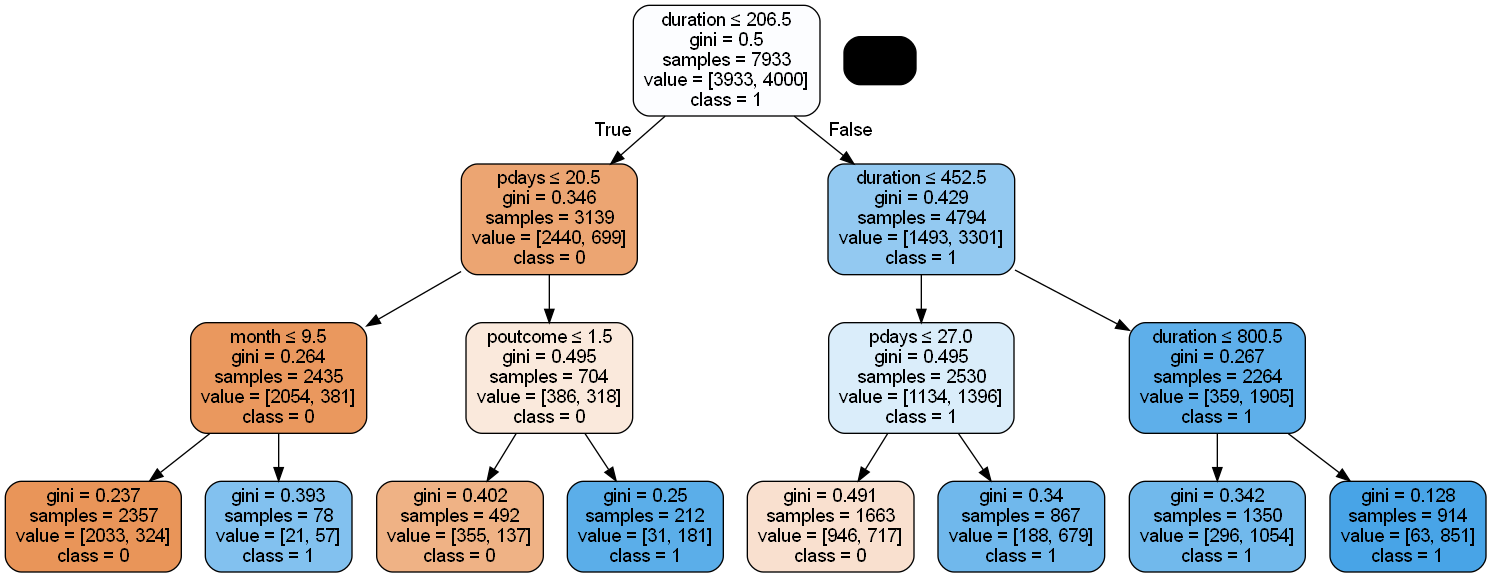

In [87]:
#Ilustrasi setelah max_depth diubah jadi 5
dot_data = StringIO()

tree.export_graphviz(dtc2, out_file=dot_data,
                     class_names=['0','1'], # nama target
                     feature_names=feature_col_names,
                     filled=True,
                     rounded=True,
                     special_characters=True)
graph  = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

Dapat dilihat hasilnya seperti gambar diatas. Sangat jauh berbeda dari decision yang awal, yang ini jauh lebih simple dan bisa dibaca dengan baik.

## Model 5 : Random Forest
Random Forest adalah kombinasi dari  masing-masing tree yang baik kemudian dikombinasikan  ke dalam satu model. Random Forest bergantung pada sebuah nilai vector random dengan distribusi yang sama pada semua pohon yang masing masing Decision Tree memiliki kedalaman yang maksimal. 

In [62]:
#Data split
from sklearn.model_selection import train_test_split
feature_col_names = ['age', 'job', 'marital', 'education', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'poutcome']
predicted_class_names = ['Client_Subscribed']

x = df_undersampling[feature_col_names].values
y = df_undersampling[predicted_class_names].values
split_test_size = 0.25

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=1)

In [63]:
print("{0:0.2f}% ada pada training set". format((len(x_train)/len(df_undersampling.index)) * 100))
print("{0:0.2f}% ada pada test set". format((len(x_test)/len(df_undersampling.index)) * 100))

75.00% ada pada training set
25.00% ada pada test set


In [64]:
#model training
RFC_model = RandomForestClassifier(n_estimators=100)
RFC_model.fit(x_train, y_train.ravel())

RandomForestClassifier()

In [65]:
#Mengevaluasi model
RFC_predict_train = RFC_model.predict(x_train)

from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, RFC_predict_train)))

Accuracy: 1.0000


In [66]:
RFC_predict_test = RFC_model.predict(x_test)
from sklearn import metrics

print("lr_predict_test", RFC_predict_test)
print("y_test", y_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, RFC_predict_test)))

lr_predict_test [0 1 0 ... 1 0 0]
y_test [[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]
Accuracy: 0.8499


In [67]:
#confusion matrix
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, RFC_predict_test)))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_test, RFC_predict_test))

Confusion Matrix
[[1145  211]
 [ 186 1103]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1356
           1       0.84      0.86      0.85      1289

    accuracy                           0.85      2645
   macro avg       0.85      0.85      0.85      2645
weighted avg       0.85      0.85      0.85      2645



**Kesimpulan** <br>
Dapat dilihat bahwa hasil precision, recall dan f1-score pada Y (0 dan 1) > 80%. Datanya juga seimbang (tidak ada yang rentangnya sangat rendah atau sangat tinggi, berkisar antara 84% - 86%). Diperoleh hasil akurasi sebesar 85%.

## Model 6 : Naïve Bayes
Naïve Bayes merupakan algoritma Machine Learning untuk klasifikasi dengan efisiensi komputasi dan akurasi yang baik, khususnya untuk dimensi dan jumlah data yang besar. Akan tetapi performa algoritma ini akan menurun jika antar atribut tidak memiliki keterkaitan satu sama lain. 

In [68]:
#Data split
from sklearn.model_selection import train_test_split
feature_col_names = ['age', 'job', 'marital', 'education', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'poutcome']
predicted_class_names = ['Client_Subscribed']

x = df_undersampling[feature_col_names].values
y = df_undersampling[predicted_class_names].values
split_test_size = 0.25

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=1)

In [69]:
print("{0:0.2f}% ada pada training set". format((len(x_train)/len(df_undersampling.index)) * 100))
print("{0:0.2f}% ada pada test set". format((len(x_test)/len(df_undersampling.index)) * 100))

75.00% ada pada training set
25.00% ada pada test set


In [70]:
#model training
NB_model = GaussianNB()
NB_model.fit(x_train, y_train.ravel())

GaussianNB()

In [71]:
#Mengevaluasi model
NB_predict_train = NB_model.predict(x_train)

from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, NB_predict_train)))

Accuracy: 0.7110


In [72]:
NB_predict_test = NB_model.predict(x_test)
from sklearn import metrics

print("lr_predict_test", NB_predict_test)
print("y_test", y_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, NB_predict_test)))

lr_predict_test [0 1 0 ... 0 1 1]
y_test [[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]
Accuracy: 0.7172


In [73]:
#confusion matrix
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, NB_predict_test)))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_test, NB_predict_test))

Confusion Matrix
[[1106  250]
 [ 498  791]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.82      0.75      1356
           1       0.76      0.61      0.68      1289

    accuracy                           0.72      2645
   macro avg       0.72      0.71      0.71      2645
weighted avg       0.72      0.72      0.71      2645



**Kesimpulan** <br>
Dapat dilihat bahwa hasil precision, recall dan f1-score pada Y (0 dan 1) > 60%. Datanya juga seimbang (tidak ada yang rentangnya sangat rendah atau sangat tinggi, berkisar antara 61% - 82%). Diperoleh hasil akurasi sebesar 72%.

## Model 7 : Confusion Matrix
Confusion Matrix adalah pengukuran performa untuk masalah klasifikasi machine learning dimana keluaran dapat berupa dua kelas atau lebih. Confusion Matrix berupa tabel dengan 4 kombinasi berbeda dari nilai prediksi dan nilai aktual.

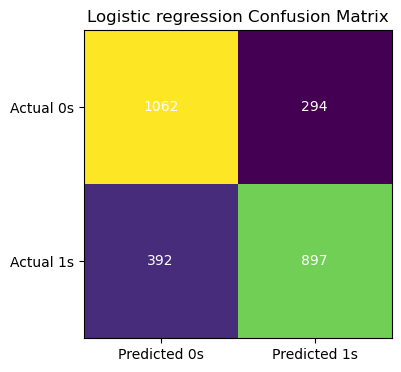

In [74]:
#Logistic regression
confMLR = confusion_matrix(y_test, lr_predict_test)

fig,ax = plt.subplots(figsize=(4,4))
plt.title("Logistic regression Confusion Matrix")
ax.imshow(confMLR)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,confMLR[i,j],ha='center',va='center',color='white')
plt.show()

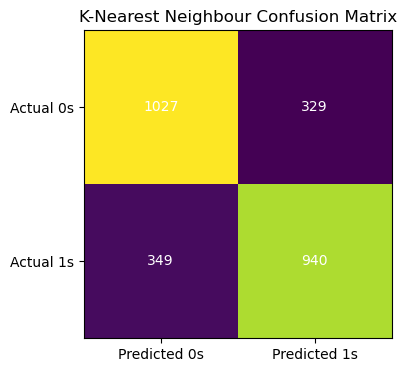

In [75]:
#KNN 
confMLR = confusion_matrix(y_test, KNN_predict_test)

fig,ax = plt.subplots(figsize=(4,4))
plt.title("K-Nearest Neighbour Confusion Matrix")
ax.imshow(confMLR)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,confMLR[i,j],ha='center',va='center',color='white')
plt.show()

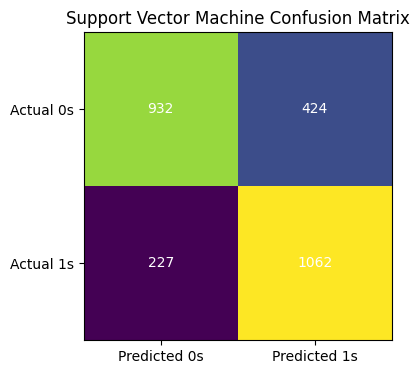

In [59]:
#SVM
confMLR = confusion_matrix(y_test, SVM_predict_test)

fig,ax = plt.subplots(figsize=(4,4))
plt.title("Support Vector Machine Confusion Matrix")
ax.imshow(confMLR)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,confMLR[i,j],ha='center',va='center',color='white')
plt.show()

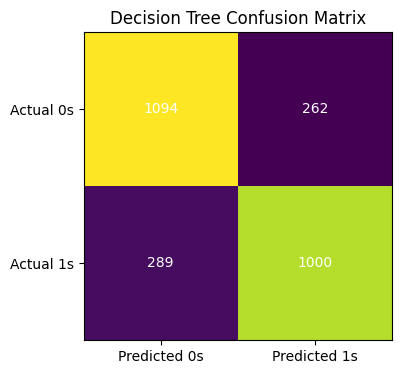

In [60]:
#Decision Tree
confMLR = confusion_matrix(y_test, destree_predict_test)

fig,ax = plt.subplots(figsize=(4,4))
plt.title("Decision Tree Confusion Matrix")
ax.imshow(confMLR)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,confMLR[i,j],ha='center',va='center',color='white')
plt.show()

In [62]:
#Random forest
confMLR = confusion_matrix(y_test, RFC_predict_test)

fig,ax = plt.subplots(figsize=(4,4))
plt.title("Random Forest Confusion Matrix")
ax.imshow(confMLR)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,confMLR[i,j],ha='center',va='center',color='white')
plt.show()

NameError: name 'RFC_predict_test' is not defined

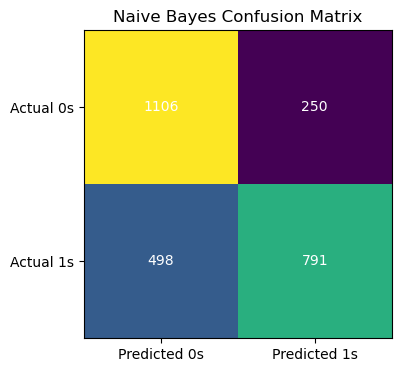

In [83]:
# Naive Bayes
confMLR = confusion_matrix(y_test, NB_predict_test)

fig,ax = plt.subplots(figsize=(4,4))
plt.title("Naive Bayes Confusion Matrix")
ax.imshow(confMLR)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,confMLR[i,j],ha='center',va='center',color='white')
plt.show()

**Kesimpulan keseluruhan**
- Data yang digunakan adalah data bank-full 
- Variabel X : age, job, marital, education, balance, day, month, duration, campaign, pdays, poutcome 
- Variabel Y :  Client_Subscribed
- Melalui proses undersampling karena jumlah variabel Y yang tidak balance
- Memodelkan machine learning

1. Logistic Regression<br>
   Akurasi sebesar 74% <br>
   
   
2. K-Nearest Neighbour<br>
   Akurasi sebesar 74%<br>
   
   
3. Support Vector Machine<br>
   Akurasi sebesar ..%<br>
   
   
4. Decision Tree <br>
   Akurasi sebesar 78% <br>
   
   
5. Random Forest <br>
   Akurasi sebesar 85% <br>
   
   
6. Naïve Bayes<br>
   Akurasi sebesar 72%
   
Dari ke-6 model machine learning yang telah dibuat, diperoleh hasil bahwa model Random Forest memiliki akurasi paling tinggi yaitu 85%. 